# cepstrum解析実装
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/kikuchiken-waseda/speech_processing/blob/master/source/implementation/cepstrum.ipynb)

## 音声の準備

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

In [2]:
from typing import List

def make_sin_waves(
    max_amp: float,
    freq_list: List[str],
    fs: int,
    sec: float) -> List[float]:
    """
    max_amp: 最大振幅
    freq_list: まぜる周波数
    fs: サンプリング周波数
    sec: サイン波の持続時間
    """

    amp = float(max_amp) / len(freq_list) # 各波の最大振幅を設定
    data = []
    for n in np.arange(sec * fs):
        s = 0.0
        for f in freq_list:
            s += amp * np.sin(2 * cmath.pi * f * n / fs)
        data.append(s)
    return data

In [3]:
max_amp = 0.1
freq_list = [220, 440, 880]
fs = 16000
sec = 0.2

In [4]:
data = make_sin_waves(max_amp, freq_list, fs, sec)

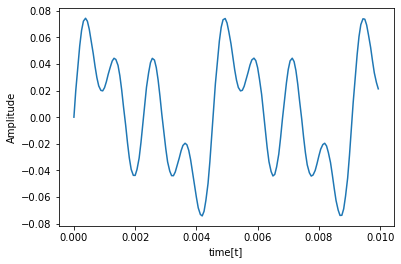

In [5]:
time = [round(i/fs, 5) for i in range(len(data))]
plt.plot(time[0:160], data[0:160])
plt.xlabel("time[t]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
import IPython.display
IPython.display.Audio(data=data, rate=fs)

## DFT

In [7]:
def dft(x):
    N = len(x)
    A = np.arange(N)
    k = A.reshape(1, -1)
    t = A.reshape(-1, 1)
    X = x * cmath.e**(-1j * 2 * cmath.pi * k * t  / N)
    return np.sum(X, axis=1)

### パワースペクトラム

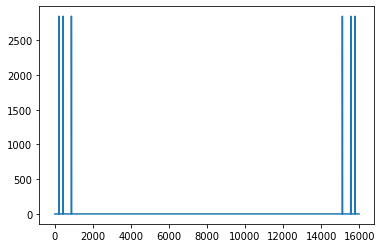

In [8]:
a = np.abs(dft(data))**2
f = [round(i/sec) for i in range(a.size)]
plt.plot(f,a)
plt.show()

## STFT

参考　

https://jp.mathworks.com/help/signal/ref/stft.html

https://tips-memo.com/python-stft

In [9]:
def window(win_length, a=0.54, b=0.46):
    data = []
    for i in range(win_length):
        data.append(a + b * np.cos(2 * cmath.pi * i / win_length))
    return data

In [10]:
def stft(x, N=2048, hop=0.5):

    S = int(N * hop) # intは切り捨て

    # 窓関数をかける時に端点が問題になるため、paddingを行う
    # 反転パディングなるものがある
    pad_first = x[:S]
    pad_last = x[-S:][::-1]
    x_pad = np.concatenate([pad_first, x, pad_last])

    # 窓関数を適用する回数
    M = int((x_pad.size - S)/(N - S))
    # ハミング窓
    hamm = window(N)
    
    # 結果を格納する箱
    spec = []
    
    for m in range(M):
        # 窓関数の適応
        windowed_x = x_pad[m*S:m*S+N] * hamm
        
        # dft
        spec.append(dft(windowed_x))
        
    return spec

In [18]:
def plot_spec(specgram, sec, fs):
    amp = np.abs(specgram).T
    t = np.linspace(0, fs, amp.shape[0])
    f = np.linspace(0, sec, amp.shape[1])

    plt.pcolormesh(f, t, amp, shading='auto')

In [17]:
specgram = stft(data, N=512, hop = 0.5)

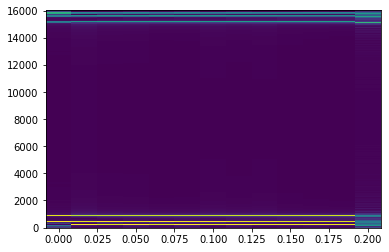

In [19]:
plot_spec(specgram, sec, fs)

# 実際のところ

In [ ]:
!pip install librosa

In [ ]:
import librosa
import librosa.display

In [ ]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [ ]:
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()